In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [2]:
data = pd.read_csv(r"M:\Emot01\text001.csv")

In [4]:
data.head(4)

,text,Emotion
0,i tried to break up was based on me not being ...,Anger
1,i was trying out the free flyknit they were ge...,Fear
2,i feel sincere relationship and staggering und...,Joy
3,i feel gods pressence its a neurotic message t...,Fear


In [5]:
data.shape

(436809, 2)

In [6]:
data.duplicated().sum()

np.int64(20646)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visual

(array([ 57317.,      0.,  47712.,      0., 146067.,      0.,  34554.,
             0., 126187.,      0.,   5000.,      0.,  14972.,      0.,
          5000.]),
 array([0.        , 0.46666667, 0.93333333, 1.4       , 1.86666667,
        2.33333333, 2.8       , 3.26666667, 3.73333333, 4.2       ,
        4.66666667, 5.13333333, 5.6       , 6.06666667, 6.53333333,
        7.        ]),
 <BarContainer object of 15 artists>)

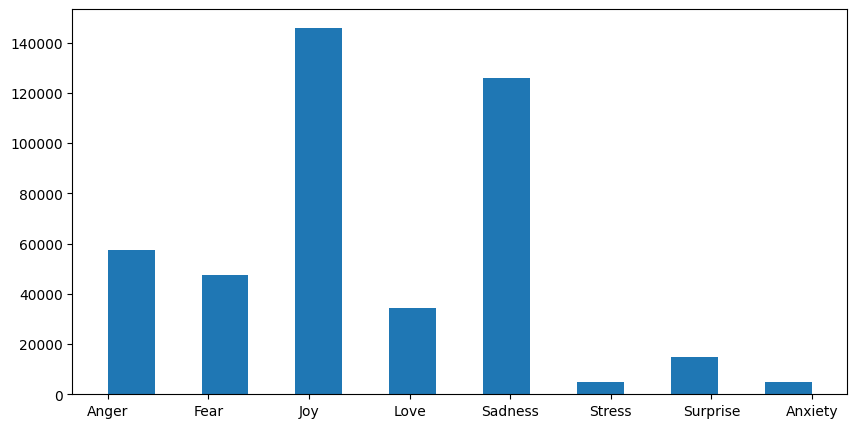

In [47]:
plt.figure(figsize=(10,5))
plt.hist(data['Emotion'],bins=15)

# Load and preprocess Data

In [7]:
# Step 1: Load and Preprocess Data
def load_and_preprocess_data(file_path):
    """Load and clean the dataset."""
    # Load dataset
    data = pd.read_csv(file_path)

    # Inspect and clean the data
    data.dropna(inplace=True)  # Drop missing values

    # Standardize text
    def clean_text(text):
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and special characters
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
        return text

    data['cleaned_text'] = data['text'].apply(clean_text)

    return data

# Spilt the data

In [8]:
# Load the data
data_path = "M:/Emot01/text001.csv"
data = load_and_preprocess_data(data_path)

# Step 2: Split the Data
X = data['cleaned_text']  # Features (Text)
y = data['Emotion']          # Target (Emotion)

train_texts, val_texts, train_labels, val_labels = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Extraction using TF-IDF

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TF-IDF representation (sparse matrix)
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features for efficiency
X_train = vectorizer.fit_transform(train_texts)
X_val = vectorizer.transform(val_texts)

# Use X_train and X_val directly in models that support sparse input (e.g., Scikit-learn models)


# Train a Logistic Regression Model

In [10]:
model = LogisticRegression(max_iter=1000, random_state=18)
model.fit(X_train, train_labels)

LogisticRegression(max_iter=1000, random_state=18)

# Evaluate the Model

In [11]:
val_predictions = model.predict(X_val)
print("Classification Report:\n", classification_report(val_labels, val_predictions))
print("Accuracy Score:", accuracy_score(val_labels, val_predictions))

Classification Report:
               precision    recall  f1-score   support

       Anger       0.89      0.91      0.90     11295
     Anxiety       1.00      1.00      1.00      1035
        Fear       0.85      0.85      0.85      9572
         Joy       0.92      0.94      0.93     29257
        Love       0.81      0.77      0.79      6893
     Sadness       0.94      0.94      0.94     25328
      Stress       1.00      1.00      1.00      1007
    Surprise       0.78      0.69      0.73      2975

    accuracy                           0.90     87362
   macro avg       0.90      0.89      0.89     87362
weighted avg       0.90      0.90      0.90     87362

Accuracy Score: 0.9044779194615508


# Response Generation

In [12]:
cultural_responses = {
    "sadness": "I'm here to support you. Would you like to share more?",
    "anxiety": "Take a deep breath. It's okay to feel this way. How can I help?",
    "stress": "I'm sorry you're feeling stressed. What can we do to ease it?",
    "joy": "That's wonderful! I'm so happy for you.",
    "anger": "i need to feel dangerous and pretty so here a striking dance pick deep in vogue minutes ago.",
    "fear": "i just feel really helpless and heavy hearted.",
    "love": "im still me its just im feeling affectionate here lately.",
    "surprise": "im feeling a bit amazed and grateful about having landed amid such a congregation."
}

# Function to classify and respond

In [13]:
def respond_to_user(text):
    """Classify emotion and provide a response."""
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    transformed_text = vectorizer.transform([cleaned_text]).toarray()
    emotion = model.predict(transformed_text)[0]
    response = cultural_responses.get(emotion, "I'm here to listen. Tell me more.")
    return emotion, response

# Response Generation

In [ ]:
user_input = input("Enter the Sentence")
emotion, response = respond_to_user(user_input)
print(f"Detected Emotion: {emotion}")
print(f"Chatbot Responses: {response}")
print(user_input)

Enter the Sentence i feel a bit less scared


Detected Emotion: Fear
Chatbot Response: I'm here to listen. Tell me more.
i feel a bit less scared
